# E-mail sort: Spam or non-spam: Machine Learning Project

## Defining the question

### Specifying the question

Classifying email data as either spam or email.

### Defining the metrics of success

To consider my project successful, I should have been able to build a Naive Bayes model that predicts whether an email is either spam or not.

### Understanding the context

The data records each represent an email, and the columns detail the counts for different words and punctuations found in the emails, information about capital letter sequences and whether an email is a spam or not

## Reading the data

Importing relevant libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics, model_selection, naive_bayes, preprocessing

Loading the data:

In [2]:
data =pd.read_csv("/content/spambase.data")
names =pd.read_csv("/content/spambase.names", sep='|', header=27)

plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['axes.titleweight'] = 700
plt.rcParams['axes.titlesize'] = 16

## Checking the data

In [3]:
# displaying the shape of the dataset.

data.shape

(4600, 58)

In [4]:
# checking the column data types
data.dtypes

0         float64
0.64      float64
0.64.1    float64
0.1       float64
0.32      float64
0.2       float64
0.3       float64
0.4       float64
0.5       float64
0.6       float64
0.7       float64
0.64.2    float64
0.8       float64
0.9       float64
0.10      float64
0.32.1    float64
0.11      float64
1.29      float64
1.93      float64
0.12      float64
0.96      float64
0.13      float64
0.14      float64
0.15      float64
0.16      float64
0.17      float64
0.18      float64
0.19      float64
0.20      float64
0.21      float64
0.22      float64
0.23      float64
0.24      float64
0.25      float64
0.26      float64
0.27      float64
0.28      float64
0.29      float64
0.30      float64
0.31      float64
0.32.2    float64
0.33      float64
0.34      float64
0.35      float64
0.36      float64
0.37      float64
0.38      float64
0.39      float64
0.40      float64
0.41      float64
0.42      float64
0.778     float64
0.43      float64
0.44      float64
3.756     float64
61        

In [5]:
# previewing the head of the dataset

data.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [6]:
# previewing the tail of the dataframe

data.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [7]:
# previewing the names dataset

names

,Unnamed: 0,"For more information, see file 'spambase.DOCUMENTATION' at the"
0,NaN,UCI Machine Learning Repository: http://www.i...
1,"1, 0.","spam, non-spam classes"
2,word_freq_make: continuous.,NaN
3,word_freq_address: continuous.,NaN
4,word_freq_all: continuous.,NaN
5,word_freq_3d: continuous.,NaN
6,word_freq_our: continuous.,NaN
7,word_freq_over: continuous.,NaN
8,word_freq_remove: continuous.,NaN
9,word_freq_internet: continuous.,NaN


## Data cleaning

In [8]:
# checking for missing values and duplicates

print(data.isnull().any().any())
print(data.duplicated().any())

False
True


In [9]:
# dropping duplicates

data.drop_duplicates(inplace=True)

In [10]:
# cleaning the names dataset

# the column names begin from row index 2
columns =names.iloc[2:]

# splitting the column into two
columns =columns['Unnamed: 0'].str.split(expand= True)

# naming my columns
columns.columns = ['column_name', 'variable_type']
columns

,column_name,variable_type
2,word_freq_make:,continuous.
3,word_freq_address:,continuous.
4,word_freq_all:,continuous.
5,word_freq_3d:,continuous.
6,word_freq_our:,continuous.
7,word_freq_over:,continuous.
8,word_freq_remove:,continuous.
9,word_freq_internet:,continuous.
10,word_freq_order:,continuous.
11,word_freq_mail:,continuous.


In [11]:
naming = list(columns.column_name)
naming.append('spam')

data.columns = naming
data.head()

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,word_freq_receive:,word_freq_will:,word_freq_people:,word_freq_report:,word_freq_addresses:,word_freq_free:,word_freq_business:,word_freq_email:,word_freq_you:,word_freq_credit:,word_freq_your:,word_freq_font:,word_freq_000:,word_freq_money:,word_freq_hp:,word_freq_hpl:,word_freq_george:,word_freq_650:,word_freq_lab:,word_freq_labs:,word_freq_telnet:,word_freq_857:,word_freq_data:,word_freq_415:,word_freq_85:,word_freq_technology:,word_freq_1999:,word_freq_parts:,word_freq_pm:,word_freq_direct:,word_freq_cs:,word_freq_meeting:,word_freq_original:,word_freq_project:,word_freq_re:,word_freq_edu:,word_freq_table:,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


## Exploratory Data Analysis

### Univariate analysis

Text(0.5, 1.0, 'Number of records that are spam and non-spam')

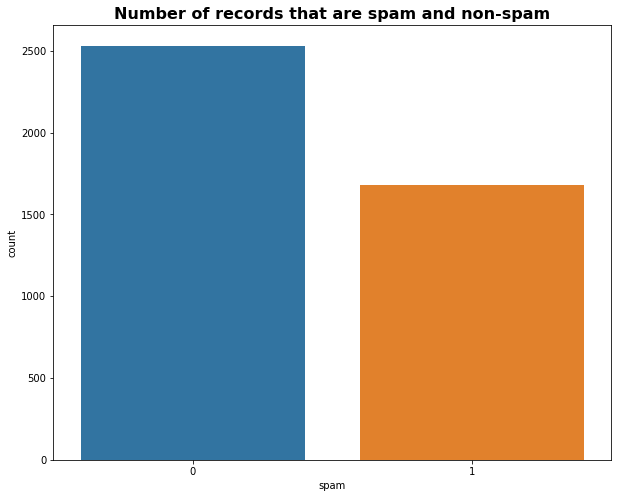

In [12]:
# plotting the number of spams and not spams

sns.countplot(x=data['spam'])
plt.title("Number of records that are spam and non-spam")

- A majority of the emails in the records are not spam.
- The frequency margin between the two categories is not very large.  

### Multivariate analysis

In [18]:
# displaying the most frequently used words in non-spam emails
# punctuation character values are not going to be included

# picking only non-spam email records
non = data[data['spam']==0]

# picking only the word frequency columns
words_non = non.iloc[:, 0:-10]

# creating a dataframe and selecting the top ten most frequently used words
word_n =pd.DataFrame(words_non.sum().sort_values(ascending=False).head(10))


Text(0.5, 1.0, 'Most frequent words in non-spam emails')

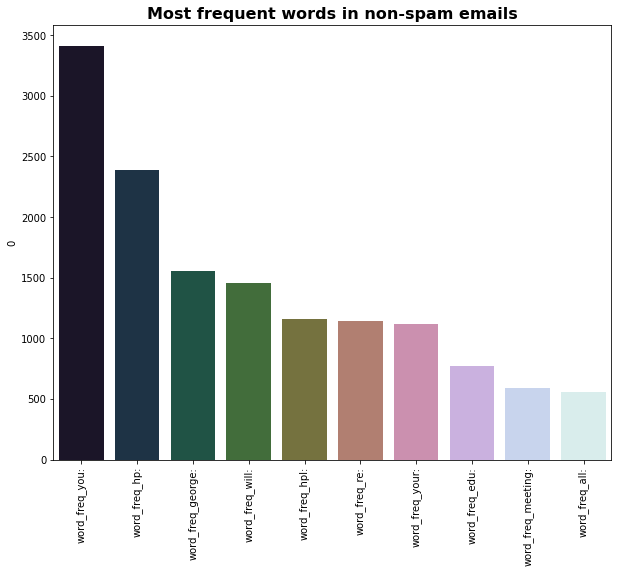

In [19]:
# plotting the data
sns.barplot(x= word_n.index, y= word_n[0], palette='cubehelix')
plt.xticks(rotation=90)
plt.title("Most frequent words in non-spam emails")

- The most frequently used word in non- spam emails is you.
- The other nine appear in this order of frequency:
   1. hp
   2. george
   3. will
   4. hpl
   5. re
   6. your
   7. edu
   8. meeting
   9. all 

Text(0.5, 1.0, 'Most frequent words in spam emails')

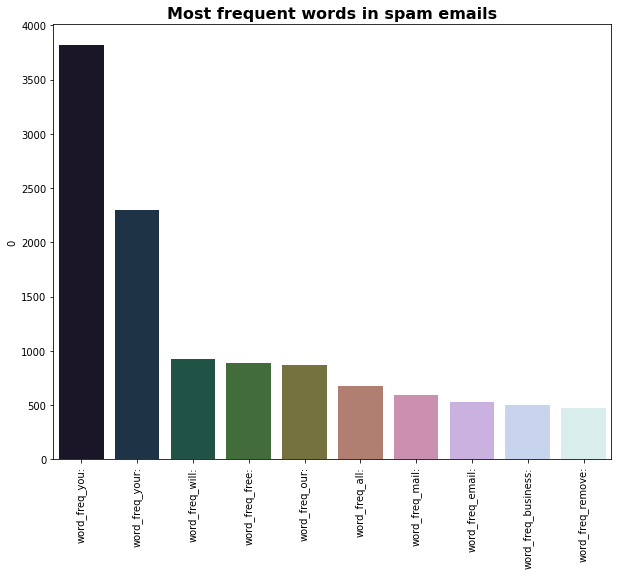

In [20]:
# displaying the least frequently used words in spam emails

spam = data[data['spam']==1]

# only picking spam email records
words_spam = spam.iloc[:, 0:-10]

word_s = pd.DataFrame(words_spam.sum().sort_values(ascending=False).head(10))


sns.barplot(x= word_s.index, y= word_s[0], palette='cubehelix')
plt.xticks(rotation=90)
plt.title("Most frequent words in spam emails")

- The most frequently used word in spam emails is you as well.
- The following nine appear as follows in terms of frequency:
   1. your
   2. will
   3. free
   4. our
   5. all
   6. mail
   7. email
   8. business
   9. remove

## Naive Bayes Model building

In [12]:
# splitting the data into train and test sets

X= data.drop(['spam'], axis=1)
y= data['spam']

X_train, X_test, y_train, y_test= model_selection.train_test_split(X,y, test_size=0.2, random_state=98)

# instatiating Multinomial naive bayes

Mnb = naive_bayes.MultinomialNB()

# training my raw data
model= Mnb.fit(X_train, y_train)

pred = model.predict(X_test)

# computing the accuracy of my model
metrics.accuracy_score(y_test, pred)

0.7743467933491687

In [13]:
# displaying the confusion matrix
metrics.confusion_matrix(y_test, pred)

array([[427,  81],
       [109, 225]])

#### Standardizing my data

I will be using MinMaxScaler to standardize my data. The values will range from 1 to 0.

In [14]:
# calling the scaling method MinMaxScaler
sc = preprocessing.MinMaxScaler()

# transforming our target and predictor variables
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

# training my data
std_model= Mnb.fit(x_train, y_train)

pred_std = std_model.predict(x_test)

# computing the accuracy score
metrics.accuracy_score(y_test, pred_std)

0.8871733966745843

- The accuracy of my model has greatly increased after standardizing my data.

In [15]:
# displaying the confusion matrix
metrics.confusion_matrix(y_test, pred_std)

array([[491,  17],
       [ 78, 256]])

#### Hyperparameter tuning

In [49]:
# creating a for loop to compute the accuracies across different alpha values 
vals = list(np.arange(0.01,1,0.02))
scores = []
alpha = []

for i in vals:
  model = naive_bayes.MultinomialNB(alpha=i)
  model = model.fit(x_train, y_train)

  predicted = model.predict(x_test)
  acc = metrics.accuracy_score(y_test, predicted)

  scores.append(acc)
  alpha.append(i)

In [67]:
# converting the two lists into dataframes and then combining them.
Scores =pd.DataFrame(scores,)
Alpha =pd.DataFrame(alpha,)

accuracy_scores= pd.concat([Scores, Alpha], axis=1)

In [69]:
# naming the columns of the dataframe
accuracy_scores.columns= ['accracy_scores', 'alpha_values']

In [79]:
# displaying the first ten alpha values with the largest accuracy score
accuracy_scores.sort_values(by=['accracy_scores'],ascending=False).head(10)

,accracy_scores,alpha_values
0,0.890736,0.01
16,0.890736,0.33
30,0.890736,0.61
29,0.890736,0.59
28,0.890736,0.57
27,0.890736,0.55
26,0.890736,0.53
1,0.890736,0.03
24,0.890736,0.49
23,0.890736,0.47


- The ten best alpha values all have an accuracy score of 89.07 which is slightly higher than the previous models.

In [80]:
# instatiating my model and setting alpha to 0.01
best_model = naive_bayes.MultinomialNB(alpha=0.01)

# training my data and generating predictions
best_model = best_model.fit(x_train, y_train)
pred_vals =best_model.predict(x_test)

# computing the accuracy score
metrics.accuracy_score(y_test, pred_vals)

0.8907363420427553

In [82]:
# displaying the final confusion matrix
metrics.confusion_matrix(y_test, pred_vals)

array([[491,  17],
       [ 75, 259]])